## Imports

In [1]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation

import numpy as np

### Displaying animation in the notebook

Choose only one option and comment out another.

In [2]:
# Option 1
# %matplotlib qt

In [3]:
# Option 2
from IPython.display import HTML

## Data

In [4]:
data = np.random.rand(20)

data

array([0.96737132, 0.09056538, 0.51572558, 0.37802427, 0.83486126,
       0.10394004, 0.42248571, 0.58751337, 0.95443951, 0.11743137,
       0.13926903, 0.72560798, 0.1770247 , 0.28721555, 0.12915741,
       0.32029072, 0.77791144, 0.26940038, 0.71304013, 0.158278  ])

In [5]:
x_vals = list(range(len(data)))
x_vals

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

## Calculations

Calculate in advance `mean` and `standard deviation` at each step of the data.

In [6]:
mean_series = []
std_series = []

for i in range(1, len(data)+1):
    mean_series.append(np.mean(data[:i]))
    std_series.append(np.std(data[:i]))

In [7]:
mean_series

[np.float64(0.9673713196774315),
 np.float64(0.5289683476944425),
 np.float64(0.5245540907337526),
 np.float64(0.4879216344605726),
 np.float64(0.5573095593419539),
 np.float64(0.4817479734580232),
 np.float64(0.4732819352364911),
 np.float64(0.4875608647830273),
 np.float64(0.5394362698452759),
 np.float64(0.49723577937481933),
 np.float64(0.4646933472269242),
 np.float64(0.48643623319324814),
 np.float64(0.4626353460637057),
 np.float64(0.45010536072908586),
 np.float64(0.4287088307768755),
 np.float64(0.4219326991125887),
 np.float64(0.442872625221616),
 np.float64(0.43323527846886484),
 np.float64(0.4479618497709279),
 np.float64(0.43347765715436914)]

In [8]:
std_series

[np.float64(0.0),
 np.float64(0.438402971982989),
 np.float64(0.3580089596989275),
 np.float64(0.31647057047433425),
 np.float64(0.3152485274485154),
 np.float64(0.3337151400349121),
 np.float64(0.30965535400879857),
 np.float64(0.2921093087972201),
 np.float64(0.31205037647340217),
 np.float64(0.3219717786934078),
 np.float64(0.3237773295816133),
 np.float64(0.3182704246601321),
 np.float64(0.3167046654039293),
 np.float64(0.3085100233454343),
 np.float64(0.3086139440361837),
 np.float64(0.2999644069805565),
 np.float64(0.30282250914530245),
 np.float64(0.2969610740681149),
 np.float64(0.2957164379499242),
 np.float64(0.29506244418668354)]

## Animate data points and the mean line using `ax.plot()`

### Mean line as a step line

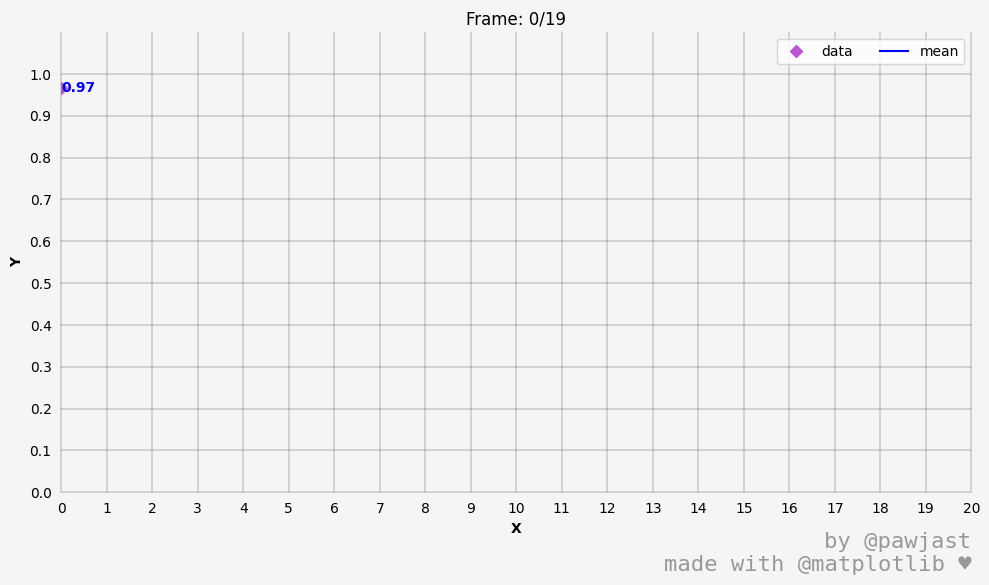

In [9]:
# CREATE FIGURE AND AXES
fig, ax = plt.subplots(
    figsize=(10, 6),
    facecolor="whitesmoke",
    layout="tight"
)

# STYLIZE THE PLOT
ax.set_frame_on(False)  # remove bg colour and spines

ax.set_xlabel("X", weight="bold")
ax.set_ylabel("Y", weight="bold")

ax.set_xlim(0, 20)
ax.set_ylim(0, 1.1)
ax.set_xticks(
    ticks=range(0, 20+1)
)
ax.set_yticks(
    ticks=np.arange(0, 1.1, 0.1)
)
ax.tick_params(
    color=(0, 0, 0, 0)
)

ax.grid(
    color="dimgray",
    lw=0.35,
    clip_on=False,
)

# Footer
ax.text(
    1, -0.18,
    "by @pawjast\nmade with @matplotlib \u2665",
    transform = ax.transAxes,
    horizontalalignment="right",
    verticalalignment="bottom",
    color="#9a9996",
    fontsize=16,
    family="monospace",
    weight="medium"
)

# SET UP AND STYLIZE EMPTY PLOT THAT'S GOING TO BE ANIMATED
my_data, = ax.plot(
    [], [],
    color="mediumorchid",
    lw=0,
    marker="D",
    markersize=6,
    label="data"
)

# Mean line
mean_line, = ax.step(
    x=[],
    y=[],
    label="mean",
    color="blue",
    where="mid"
)

txt_mean = ax.text(
    0, 0,
    s="",
    color="blue",
    va="center",
    ha="left",
    weight="bold"
)

ax.legend(
    loc="upper right",
    ncols=2
)


# CREATE FRAME UPDATE FUNCTION
def update(frame):
    "Update data for each frame"

    # Update values to plot based on the frame
    x = x_vals[:frame+1]
    y = data[:frame+1]
    mean = mean_series[:frame+1]

    # Update data plot values
    my_data.set_xdata(x)
    my_data.set_ydata(y)


    # Update mean plot value
    mean_line.set_xdata(x)
    mean_line.set_ydata(mean)

    # Update mean value label
    txt_mean.set_x(x[-1])
    txt_mean.set_y(mean[-1])
    txt_mean.set_text(f"{mean[-1]:.2f}")

    ax.set_title(f"Frame: {frame}/{len(data)-1}")

    return my_data, mean_line


# RUN THE ANIMATION
ani = animation.FuncAnimation(
    fig=fig,
    func=update,
    frames=len(data),
    interval=450,
);

In [10]:
HTML(ani.to_jshtml())

### Save to a file

In [11]:
ani.save(filename="03_mean_step_line.mp4", writer="ffmpeg")